## Tarea 002 - Análisis Multimodal MIR
### Gustavo Hernández Angeles

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from my_fun import *  # noqa: F403
from scipy.io import wavfile
from typing import Tuple
from pathlib import Path
import pandas as pd
import os
from fun import (
    get_all_notes,
    my_tokenizer,
)
from sklearn.model_selection import train_test_split
import seaborn as sns

# nota abajo D2 y D3, nota arriba D4

## Problema 3

### Inciso a)

In [5]:
def f(a:float,
      delta:float) -> float:
    return np.sign(a) * delta * np.floor(np.abs(a)/delta + 0.5)

### Inciso b)

In [6]:
def plot_cuantizada_y_error(x: np.ndarray, 
                    y: np.ndarray,
                    delta: float,
                    graph_path: str,
                    figsize=(8, 2.2)):
    y_cuantizada = f(y, delta)
    plt.figure(figsize=figsize)
    plt.plot(x, y, label='Señal original')
    plt.step(x, y_cuantizada, label='Señal cuantizada', where='mid')
    plt.xlabel('Tiempo [s]')
    plt.ylabel('Amplitud')
    plt.legend(loc='upper right')
    #plt.grid()
    plt.savefig(graph_path, bbox_inches='tight')
    plt.clf()
    
    plt.figure(figsize=figsize)
    plt.plot(x, np.abs(y - y_cuantizada), label='Error de cuantización')
    plt.xlabel('Tiempo [s]')
    plt.ylabel('Error de cuantización')
    plt.legend(loc='upper right')
    #plt.grid()
    plt.savefig(graph_path.replace('.pdf', '_error.pdf'), bbox_inches='tight')
    plt.clf()

In [7]:
## Función lineal
x = np.linspace(0, 5, 100)
y = 2 * x + 1
plot_cuantizada_y_error(x, y, delta=1, graph_path='../documento/figure/lineal_cuantizada.pdf')

<Figure size 800x220 with 0 Axes>

<Figure size 800x220 with 0 Axes>

In [8]:
## Función sinusoidal
x = np.linspace(0, 2 * np.pi, 100)
y = np.sin(x)
plot_cuantizada_y_error(x, y, delta=0.5, graph_path='../documento/figure/sinusoidal_cuantizada.pdf')

<Figure size 800x220 with 0 Axes>

<Figure size 800x220 with 0 Axes>

### Inciso c)

In [9]:
def obtener_delta(bits: int,
                  y: np.ndarray) -> np.float64:
    lmbda = 2 ** bits
    y_max = np.max(y).astype(np.float64)
    y_min = np.min(y).astype(np.float64)
    return np.abs(y_max - y_min) / (lmbda - 1)

def obtener_cuantizada(wav_path: Path,
                       bits: int) -> Tuple[int, np.ndarray]:
    audio = wavfile.read(wav_path)
    sample_rate = audio[0]
    data = audio[1]
    delta = obtener_delta(bits, data)
    data_cuantizada = f(data, delta)
    return sample_rate, data_cuantizada, data

In [10]:
bits = [2,4,6,8]
wav_path = Path("../data/audio_raw/piano-loops-127-octave-120-bpm.wav")

os.makedirs("../data/audio_cuantizado/", exist_ok=True)

for b in bits:    
    sample_rate, data_cuantizada, _ = obtener_cuantizada(wav_path, b)
    wavfile.write(f"../data/audio_cuantizado/piano-loops-127-octave-120-bpm_{b}bits.wav",
                  sample_rate,
                  data_cuantizada.astype(np.int16))

/tmp/ipykernel_351509/1406793491.py:10: WavFileWarning: Chunk (non-data) not understood, skipping it.
  audio = wavfile.read(wav_path)


In [ ]:
bits = [2, 4, 6, 8]
wav_path = Path("../data/audio_raw/major.wav")

fig_quantized, ax_quantized = plt.subplots(figsize=(8, 2.2))
fig_error, ax_error = plt.subplots(figsize=(8, 2.2))


first_iteration = True

for b in bits:    
    # Obtener la señal original y la señal cuantizada
    sample_rate, data_cuantizada, data = obtener_cuantizada(wav_path, b)
    wavfile.write(f"../data/audio_cuantizado/major_{b}bits.wav",
                  sample_rate,
                  data_cuantizada.astype(np.int16))
    
    x = np.linspace(0, len(data_cuantizada) / sample_rate, len(data_cuantizada))
    print(f"Valores únicos en la señal cuantizada a {b} bits: {len(np.unique(data_cuantizada))}")
    
    # Datos entre 2 y 2.005 segundos
    idx = (x > 2) & (x < 2.005)
    x_filtered = x[idx]
    data_cuantizada_filtered = data_cuantizada[idx, 1]
    data_filtered = data[idx, 1]
    
    # Imprime la señal original solo en la primera iteración
    if first_iteration:
        ax_quantized.plot(x_filtered, data_filtered, label='Original', 
                         alpha=0.7, color='black', linewidth=1.5)
        first_iteration = False
    
    # Grafica la señal cuantizada para cada profundidad de bits
    ax_quantized.plot(x_filtered, data_cuantizada_filtered, 
                     label=f'Cuant. {b} bits', alpha=0.9)

    # Grafica el error de cuantización para cada profundidad de bits
    ax_error.plot(x_filtered, np.abs(data_filtered - data_cuantizada_filtered),
                 label=f'Error {b} bits')

# Plot de señal
ax_quantized.set_xlabel('Tiempo [s]')
ax_quantized.set_ylabel('Amplitud')
ax_quantized.legend(loc="upper left", bbox_to_anchor=(1.01, 1))
fig_quantized.savefig('../documento/figure/major_cuantizada_all.pdf', bbox_inches='tight')
plt.close(fig_quantized)

# Plot de error
ax_error.set_xlabel('Tiempo [s]')
ax_error.set_ylabel('Error de cuantización')
ax_error.legend(loc="upper left", bbox_to_anchor=(1.01, 1))
fig_error.savefig('../documento/figure/major_error_cuantizacion_all.pdf', bbox_inches='tight')
plt.close(fig_error)

Valores únicos en la señal cuantizada a 2 bits: 4
Valores únicos en la señal cuantizada a 4 bits: 16
Valores únicos en la señal cuantizada a 6 bits: 64
Valores únicos en la señal cuantizada a 8 bits: 256


In [12]:
bits = [2,4,6,8]
wav_path = Path("../data/audio_raw/Guitar_MoreThanWords_16bit_44.1kHz_stereo.wav")

for b in bits:    
    sample_rate, data_cuantizada, _ = obtener_cuantizada(wav_path, b)
    wavfile.write(f"../data/audio_cuantizado/Guitar_MoreThanWords_16bit_44.1kHz_stereo_{b}bits.wav",
                  sample_rate,
                  data_cuantizada.astype(np.int16))

## Problema 4


### Inciso a): Crear corpus.

In [2]:
midi_dirs_path = [Path(os.path.join("../data/midi_selected/", i)) 
                  for i in os.listdir("../data/midi_selected/") 
                  if os.path.isdir(os.path.join("../data/midi_selected/", i))]
midi_dirs_path[0].name

'scarlatti'

In [ ]:
# Creamos todas las notas y las guardamos en ../data/notes/
os.makedirs("../data/notes/", exist_ok=True)
for midi_dir in midi_dirs_path:
    y = midi_dir.name
    get_all_notes(midi_dir, "../data/notes/", y)

In [2]:
corpus_path = "../data/corpus.csv"

In [ ]:
# Creamos el csv con todas las notas y el autor correspondiente
with open(corpus_path, 'w') as corpus_file:
    corpus_file.write("notes,author\n")
    notes_dir = Path("../data/notes/")
    for note_file in notes_dir.glob("*.txt"):
        author = note_file.stem.split("_")[0]
        with open(note_file, 'r') as n_f:
            note_content = n_f.read()
            corpus_file.write(f"{note_content},{author}\n")

In [37]:
# Conjuntos de entrenamiento y prueba
df = pd.read_csv(corpus_path)

df = df.dropna() # Nos aseguramos de eliminar filas con valores NaN

train_df, test_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df["author"])

train_df.to_csv("../data/corpus_train.csv", index=False)
test_df.to_csv("../data/corpus_test.csv", index=False)

In [3]:
train_df = pd.read_csv("../data/corpus_train.csv")

In [4]:
train_df.dropna().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4050 entries, 0 to 4049
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   notes   4050 non-null   object
 1   author  4050 non-null   object
dtypes: object(2)
memory usage: 63.4+ KB


/tmp/ipykernel_384608/493568330.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=10, horizontalalignment='center')


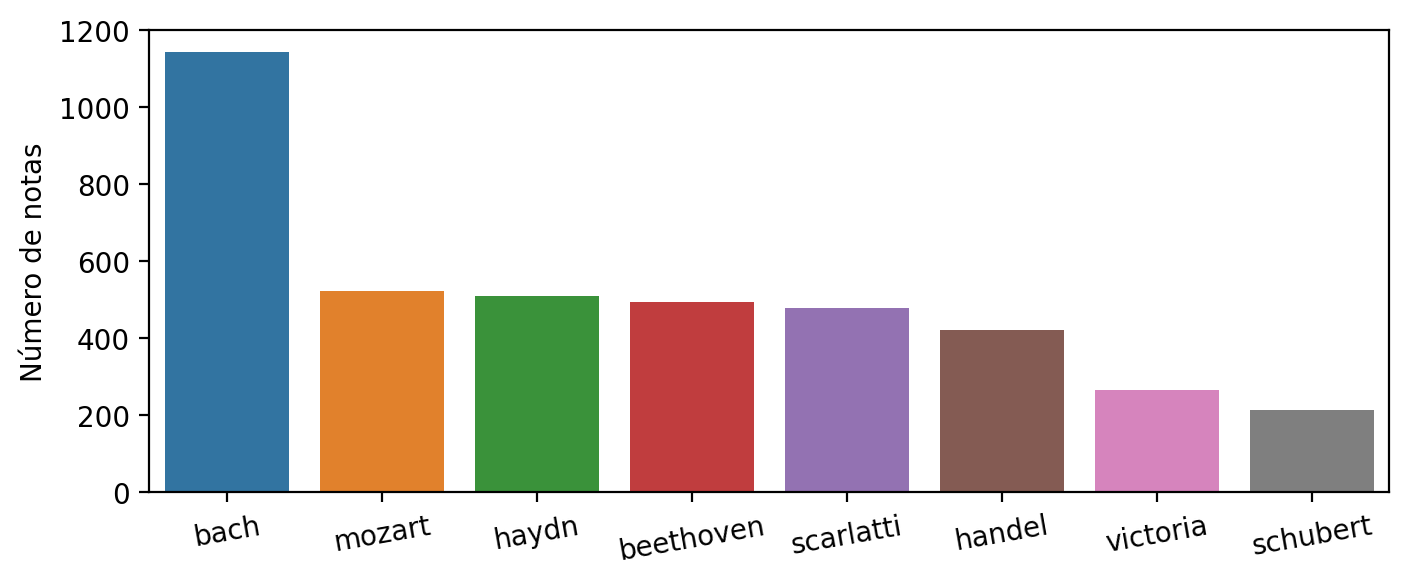

In [5]:
figures, ax = plt.subplots(figsize=(8,3))
sns.barplot(x=train_df["author"].value_counts().index,
            y=train_df["author"].value_counts().values, palette="tab10", legend=False,
            hue=train_df["author"].value_counts().index, ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=10, horizontalalignment='center')
ax.set_ylabel("Número de notas")
ax.set_xlabel("")
plt.savefig('../documento/figure/notes_per_author_train.pdf', bbox_inches='tight')

### Inciso b)

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pickle
from sklearn.metrics import (
    confusion_matrix,
    classification_report
)
from sklearn.preprocessing import LabelEncoder
import itertools
from scipy.sparse import csr_matrix

In [7]:
# Cargamos procesadores si previamente se ajustaron
vectorizer: TfidfVectorizer = pickle.load(open("../models/processor/tfidf_vectorizer.pkl", "rb"))
le: LabelEncoder = pickle.load(open("../models/processor/label_encoder.pkl", "rb"))

# Cargamos los datos si previamente se procesaron con tfidf
X_train: csr_matrix = pickle.load(open("../data/processed/X_train_tfidf.npz", "rb")) 
y_train: csr_matrix = pickle.load(open("../data/processed/y_train_tfidf.npz", "rb"))
X_test: csr_matrix = pickle.load(open("../data/processed/X_test_tfidf.npz", "rb"))
y_test: csr_matrix = pickle.load(open("../data/processed/y_test_tfidf.npz", "rb"))

In [ ]:
vectorizer = TfidfVectorizer(token_pattern=r"\b[\w.#-]+\b", 
                             ngram_range=(1,3),
                             max_features=3000)
train_df = pd.read_csv("../data/corpus_train.csv")
test_df = pd.read_csv("../data/corpus_test.csv")

y_train = train_df["author"].values.copy()
X_train = vectorizer.fit_transform(train_df["notes"].values)
y_test = test_df["author"].values.copy()
X_test = vectorizer.transform(test_df["notes"].values)

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)
y_unique = np.unique(y_train)

# Guardamos los datos procesados con tfidf
os.makedirs("../data/processed/", exist_ok=True)
with open("../data/processed/X_train_tfidf.npz", "wb") as f:
    pickle.dump(X_train, f)

with open("../data/processed/y_train_tfidf.npz", "wb") as f:
    pickle.dump(y_train, f)

with open("../data/processed/X_test_tfidf.npz", "wb") as f:
    pickle.dump(X_test, f)

with open("../data/processed/y_test_tfidf.npz", "wb") as f:
    pickle.dump(y_test, f)
    
# Guardamos los procesadores ajustados
with open("../models/processor/tfidf_vectorizer.pkl", "wb") as p_file:
    pickle.dump(vectorizer, p_file)

with open("../models/processor/label_encoder.pkl", "wb") as le_file:
    pickle.dump(le, le_file)

In [9]:
X_train.shape, X_test.shape

((4050, 3000), (1013, 3000))

In [10]:
def plot_confusion_matrix(cm, classes, title='Matriz de Confusión', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    tick_marks = range(len(classes))
    plt.xticks(tick_marks, classes, fontsize=12, rotation=15)
    plt.yticks(tick_marks, classes, fontsize=16)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black",
                 fontsize=14)

    plt.tight_layout()
    plt.savefig(f'../documento/figure/{title.replace(" ", "_").lower()}-cm.pdf', bbox_inches='tight')

In [6]:
# Aceleracion por GPU
%load_ext cuml.accel

#### Random Forest

In [36]:
from sklearn.ensemble import RandomForestClassifier

In [37]:
rf = RandomForestClassifier(random_state=42,
                             n_jobs=-1,
                             n_estimators=1000,
                             max_depth=100,
                             min_samples_split=5,
                             min_samples_leaf=2)

In [38]:
rf.fit(X_train, y_train)

,n_estimators,1000
,criterion,'gini'
,max_depth,100
,min_samples_split,5
,min_samples_leaf,2
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


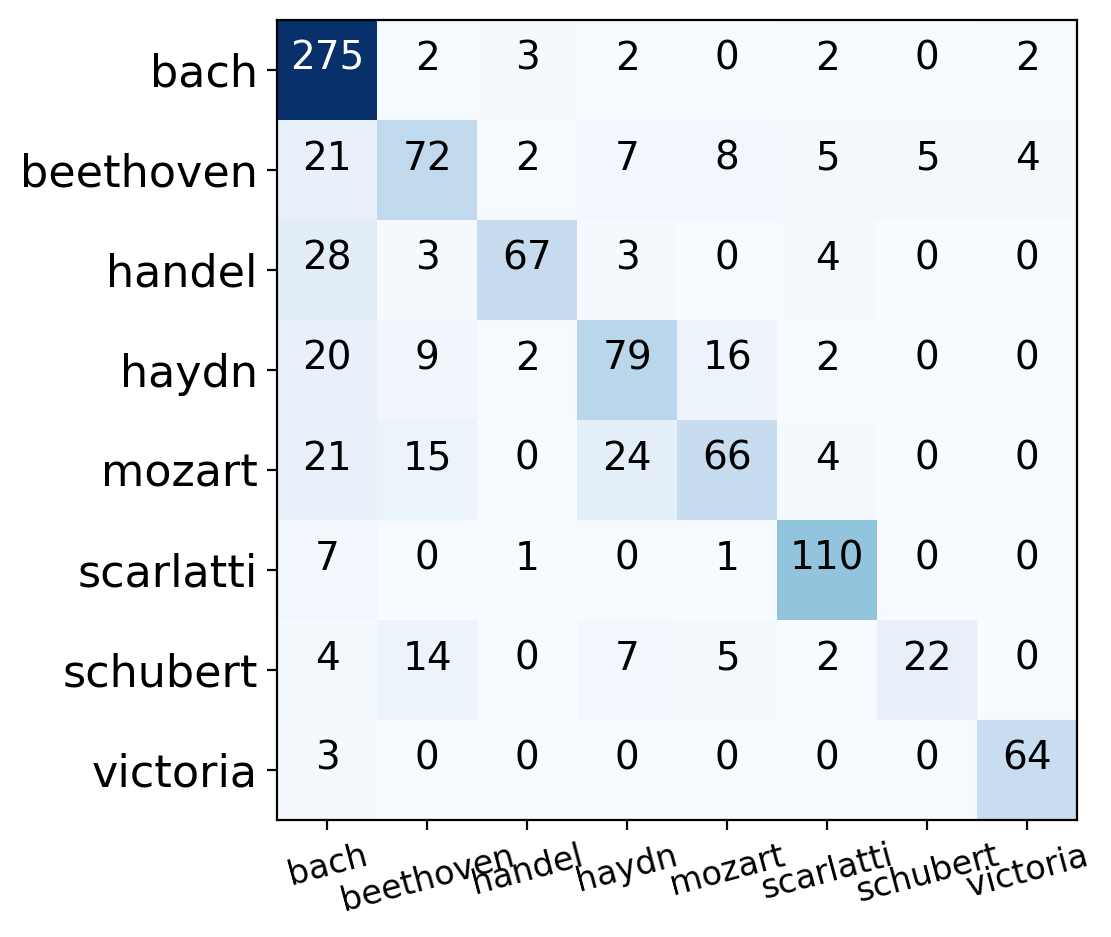

In [39]:
y_pred = rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, le.classes_, title="Random Forest")

In [40]:
print(classification_report(y_test, y_pred, target_names=le.classes_))

              precision    recall  f1-score   support

        bach       0.73      0.96      0.83       286
   beethoven       0.63      0.58      0.60       124
      handel       0.89      0.64      0.74       105
       haydn       0.65      0.62      0.63       128
      mozart       0.69      0.51      0.58       130
   scarlatti       0.85      0.92      0.89       119
    schubert       0.81      0.41      0.54        54
    victoria       0.91      0.96      0.93        67

    accuracy                           0.75      1013
   macro avg       0.77      0.70      0.72      1013
weighted avg       0.75      0.75      0.73      1013



In [41]:
with open("../models/random_forest_classifier.pkl", "wb") as rf_file:
    pickle.dump(rf, rf_file)

#### XGBoost

In [22]:
import xgboost as xgb
import mlflow
import mlflow.xgboost


In [30]:
mlflow.set_tracking_uri("http://localhost:5000")
mlflow.set_experiment("Autor Classification")
mlflow.xgboost.autolog()

In [25]:
xgb_params = {"device" : "cuda",
              "objective": "multi:softmax",
              "num_class": len(np.unique(y_train)),
              "eval_metric": "mlogloss"}
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

evallist = [(dtest, 'eval'), (dtrain, 'train')]

In [26]:
with mlflow.start_run():
    bst = xgb.train(
        xgb_params, 
        dtrain,
        num_boost_round=200,
        evals=evallist,
        early_stopping_rounds=20
    )
    print(f"Mejor iteracion: {bst.best_iteration}")
    print(f"Mejor score: {bst.best_score}")



[0]	eval-mlogloss:1.64068	train-mlogloss:1.49078
[1]	eval-mlogloss:1.44837	train-mlogloss:1.20160
[2]	eval-mlogloss:1.30860	train-mlogloss:0.99133
[3]	eval-mlogloss:1.21450	train-mlogloss:0.83016
[4]	eval-mlogloss:1.13231	train-mlogloss:0.71454
[5]	eval-mlogloss:1.07047	train-mlogloss:0.62039
[6]	eval-mlogloss:1.01642	train-mlogloss:0.54232
[7]	eval-mlogloss:0.97439	train-mlogloss:0.47878
[8]	eval-mlogloss:0.93281	train-mlogloss:0.42834
[9]	eval-mlogloss:0.90089	train-mlogloss:0.37933
[10]	eval-mlogloss:0.87209	train-mlogloss:0.34196
[11]	eval-mlogloss:0.84676	train-mlogloss:0.30940
[12]	eval-mlogloss:0.82404	train-mlogloss:0.28152
[13]	eval-mlogloss:0.81095	train-mlogloss:0.25679
[14]	eval-mlogloss:0.79706	train-mlogloss:0.23768
[15]	eval-mlogloss:0.78282	train-mlogloss:0.21991
[16]	eval-mlogloss:0.77088	train-mlogloss:0.20598
[17]	eval-mlogloss:0.75831	train-mlogloss:0.19095
[18]	eval-mlogloss:0.74646	train-mlogloss:0.17858
[19]	eval-mlogloss:0.73264	train-mlogloss:0.16620
[20]	eval-

2025/10/25 13:13:25 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/25 13:13:25 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/home/gus/CIMAT/Tercer Semestre/Multimodal/T2/.venv/lib/python3.10/site-packages/mlflow/xgboost/__init__.py:169: UserWarning: [13:13:25] WARNING: /workspace/src/c_api/c_api.cc:1575: Saving model in the UBJSON format as default.  You can use a file extension: `json` or `ubj` to choose between formats."
2025/10/25 13:13:29 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.


Mejor iteracion: 199
Mejor score: 0.00257518522036954
🏃 View run upset-shark-539 at: http://localhost:5000/#/experiments/158961068890504212/runs/50b73108e042418f89fe7b7a0a5f112a
🧪 View experiment at: http://localhost:5000/#/experiments/158961068890504212


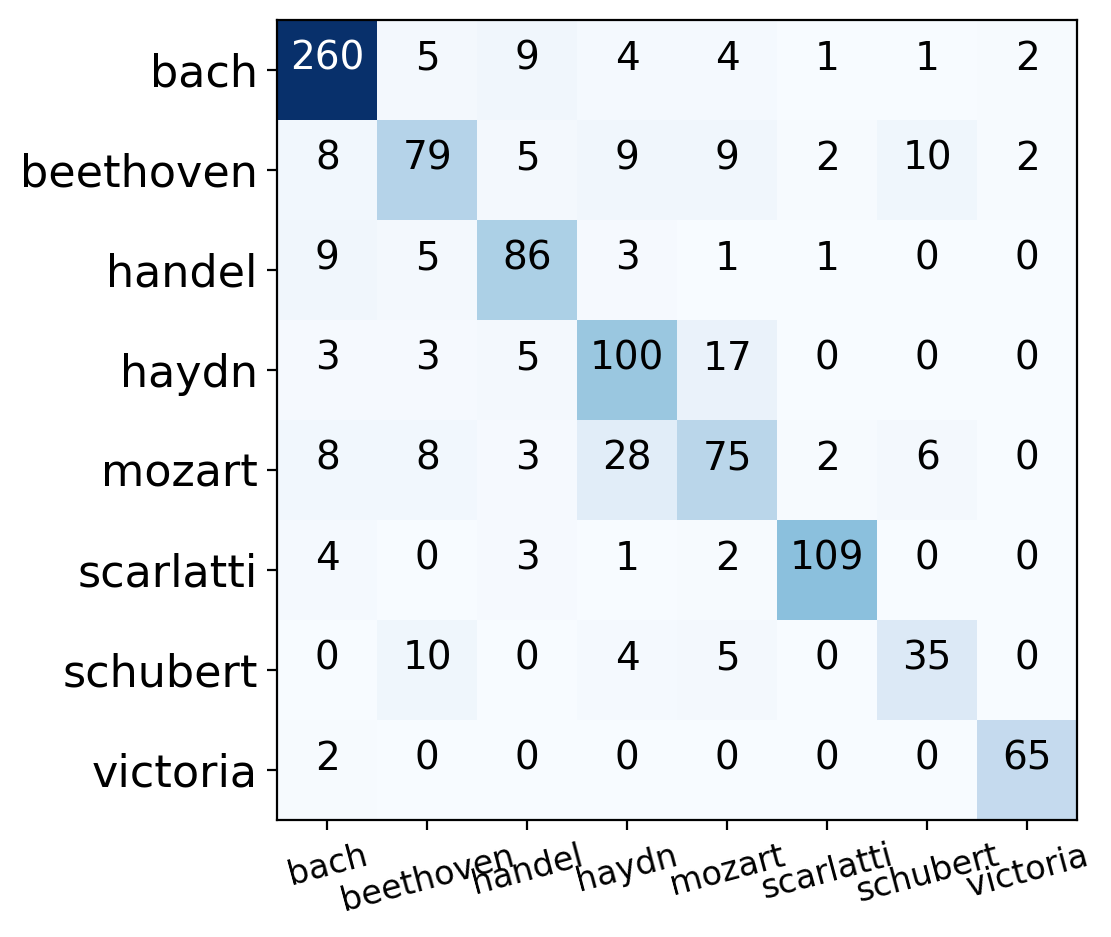

In [27]:
# Predicciones
y_pred = bst.predict(dtest)
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, le.classes_, title="XGBoost")

In [29]:
print(classification_report(y_test, y_pred, target_names=le.classes_))

              precision    recall  f1-score   support

        bach       0.88      0.91      0.90       286
   beethoven       0.72      0.64      0.68       124
      handel       0.77      0.82      0.80       105
       haydn       0.67      0.78      0.72       128
      mozart       0.66      0.58      0.62       130
   scarlatti       0.95      0.92      0.93       119
    schubert       0.67      0.65      0.66        54
    victoria       0.94      0.97      0.96        67

    accuracy                           0.80      1013
   macro avg       0.78      0.78      0.78      1013
weighted avg       0.80      0.80      0.80      1013



In [31]:
bst.save_model("../models/xgboost_model.json")

#### SVM Kernel Gaussiano

In [11]:
%load_ext cuml.accel

The cuml.accel extension is already loaded. To reload it, use:
  %reload_ext cuml.accel


In [12]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
import mlflow
import mlflow.sklearn

In [13]:
mlflow.set_tracking_uri("http://localhost:5000")
mlflow.set_experiment("Autor Classification")
mlflow.sklearn.autolog()

In [14]:
ovr_classifier = OneVsRestClassifier(
    SVC(
        kernel='rbf', probability=True
    )
)

In [15]:
with mlflow.start_run(run_name="SVM Kernel Gaussiano"):
    ovr_classifier.fit(X_train, y_train)

2025/10/25 13:33:32 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.


🏃 View run SVM Kernel Gaussiano at: http://localhost:5000/#/experiments/158961068890504212/runs/a22f02e4902146a399acc89789a58996
🧪 View experiment at: http://localhost:5000/#/experiments/158961068890504212


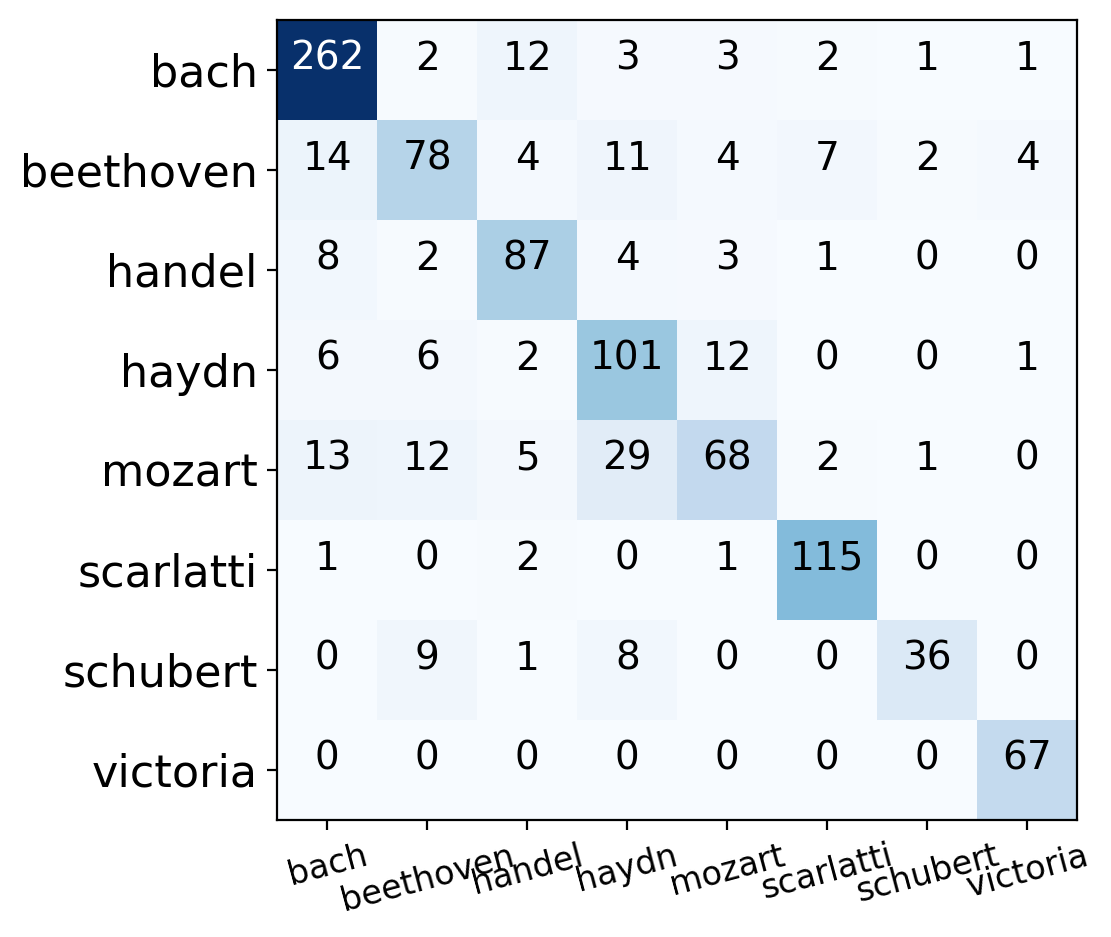

In [16]:
y_pred = ovr_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, le.classes_, title="SVM Kernel Gaussiano")


In [17]:
print(classification_report(y_test, y_pred, target_names=le.classes_))


              precision    recall  f1-score   support

        bach       0.86      0.92      0.89       286
   beethoven       0.72      0.63      0.67       124
      handel       0.77      0.83      0.80       105
       haydn       0.65      0.79      0.71       128
      mozart       0.75      0.52      0.62       130
   scarlatti       0.91      0.97      0.93       119
    schubert       0.90      0.67      0.77        54
    victoria       0.92      1.00      0.96        67

    accuracy                           0.80      1013
   macro avg       0.81      0.79      0.79      1013
weighted avg       0.80      0.80      0.80      1013



In [18]:
with open("../models/svm_rbf_ovr_classifier.pkl", "wb") as svm_file:
    pickle.dump(ovr_classifier, svm_file)